## Predicting Wine Quality

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('winequality-white.csv', sep=";")

#setting up features (x) and target (y)
x = df.drop(columns=['quality'])
y = df['quality']

#split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Linear Regression

In [2]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model (Linear Regression)
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.5690247717229232
Mean Absolute Error (MAE): 0.5862665383250459
R-squared (R²): 0.2652750042179184


Random Forest

In [3]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor, fit to data, and predict
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.3333171408163265
Mean Absolute Error (MAE): 0.41323877551020405
R-squared (R²): 0.5696207844539691


## Feature Importance

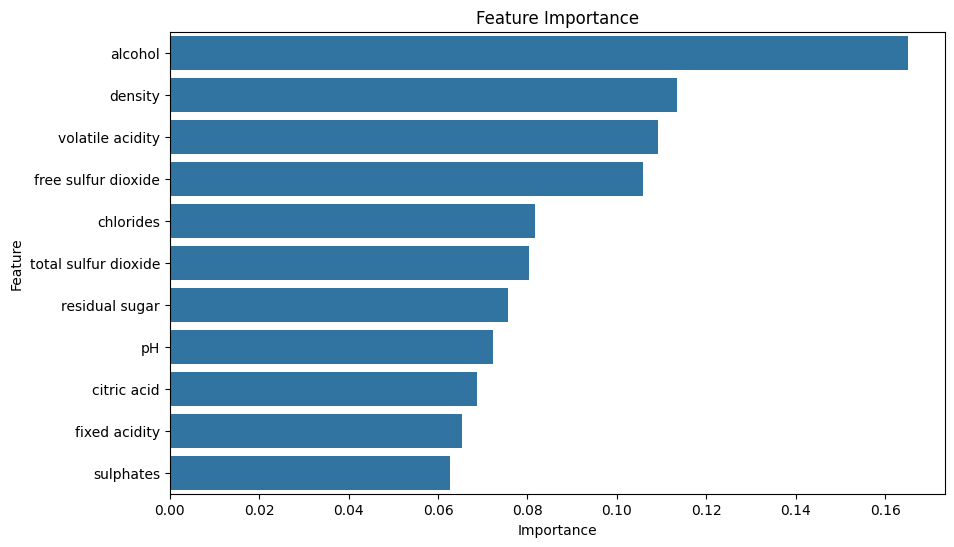

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Map importance scores to feature names
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x_train)

# Summary plot of feature importance
shap.summary_plot(shap_values, x_train)

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
